<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_25_Oct_(Convergencia_de_Blen).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance, median
from scipy.stats import norm, linregress, kstest, gaussian_kde
from scipy.optimize import minimize
import random as rnd
from random import random, gauss, seed
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import minimize
from numba import jit
# < > ∈ o ∉ | λ
#@jit(nopython=True)

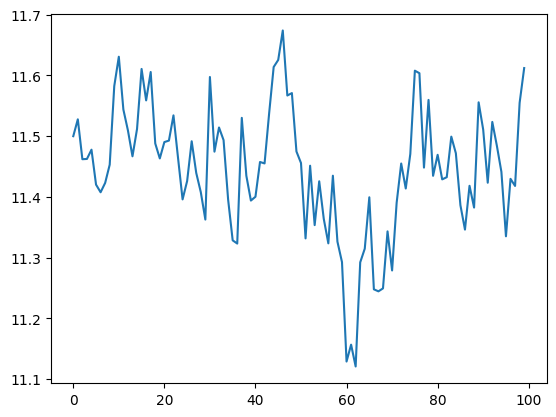

KstestResult(statistic=0.004026231402330938, pvalue=0.9967330045132388, statistic_location=11.44704802177556, statistic_sign=-1)
Maxima diferencia 0.11711577392401828 11.412692369805537


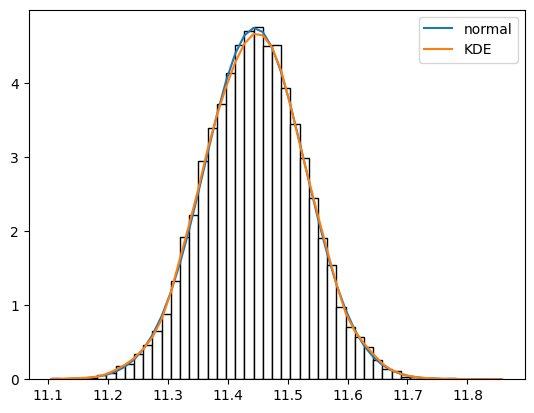

0.03303299744923909


In [12]:
# xa = x aproximado
# Convergencia de Blen

@jit(nopython=True)
def F(xx, u, o, c):
  return c*(xx-u)

@jit(nopython=True)
def G(xx, u, o, c):
  return o*sqrt(xx)

@jit(nopython=True)
def Gp(xx, u, o, c):
  return o/(2*sqrt(xx))

@jit(nopython=True)
def gen(n, y0, delta, u, o, c):
  ly=np.zeros(n)
  ly[0]=y0
  oo=sqrt(delta)
  for i in range(n-1):
    xx=ly[i]
    t=0
    while t<1:
      w=oo*gauss(0,1)
      xx=xx + F(xx, u, o, c)*delta + G(xx, u, o, c)*w + (1/2)*G(xx, u, o, c)*Gp(xx,u,o,c)*(w**2-delta)
      t=t+delta
    ly[i+1]=xx
  return ly

@jit(nopython=True)
def K(xx, h, l):
  suma=0
  for i in range(len(l)):
    suma=suma+ (1/sqrt(2*pi))*exp(-((xx-l[i])/h)**2/2)
  return suma/(h*len(l))

@jit(nopython=True)
def f(i, x, delta, ly, nr):
  oo=sqrt(delta)
  u=x[0]
  o=x[1]
  c=x[2]
  l=np.zeros(nr)
  for j in range(nr):
    xx=ly[i]
    t=0
    while t<1:
      w=oo*gauss(0,1)
      xx=xx + F(xx, u, o, c)*delta + G(xx, u, o, c)*w + (1/2)*G(xx, u, o, c)*Gp(xx,u,o,c)*(w**2-delta)
      #xx=xx+ c*(xx-u)*delta + oo*o*gauss(0,1)
      t=t+delta
    l[j]=xx
  return l

t1=time()
u=11.5
o=0.03
c=-0.4
delta=0.01
n=100
nr=10000
y0=u
ly=gen(n, y0, delta, u, o, c)
plt.plot(ly)
plt.show()
x0=np.array([u, o, c])
i=5
l=f(i, x0, delta, ly, nr)
media=np.mean(l)
st=np.std(l)
h=1.06*st/(nr**0.2)
ks=kstest(l, "norm", args=(media, st))
print(ks)
x1=min(l)
x2=max(l)
x=x1
b=[]
while x<x2:
  b.append(x)
  x=x+(x2-x1)/50
bn=[]
ba=[]
maximo=0
xm=0
for x in b:
  xn=norm.pdf(x, media, st)
  xa=K(x, h, l)
  if abs(xn-xa)>maximo:
    maximo=abs(xn-xa)
    xm=x
  bn.append(xn)
  ba.append(xa)
print("Maxima diferencia", maximo, xm)
plt.hist(l, density=1, bins=b, color="white", edgecolor="black")
plt.plot(b, bn, label="normal")
plt.plot(b, ba, label="KDE")
plt.legend()
plt.show()
t2=time()
print((t2-t1)/60)




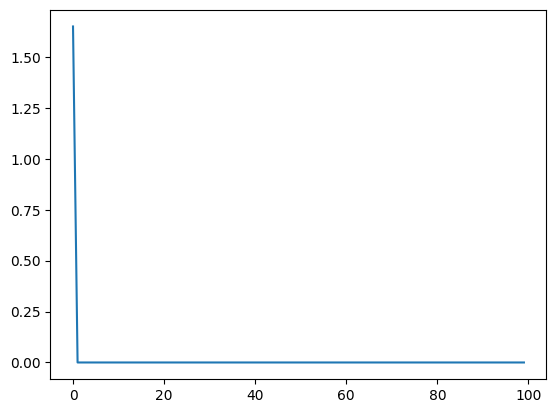

KstestResult(statistic=0.0024147430925250957, pvalue=1.7202710891805487e-05, statistic_location=0.4893685114150003, statistic_sign=1)
Maxima diferencia 1.1883193074725114 0.49011820088109115


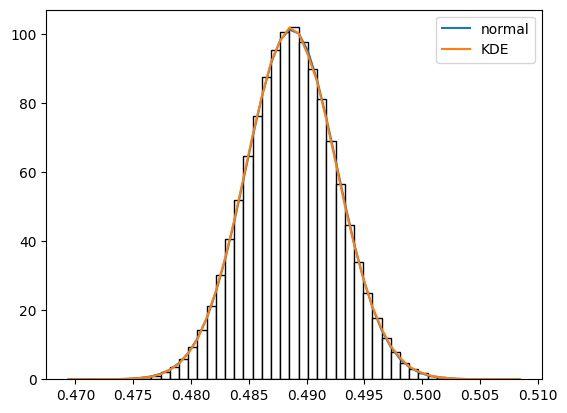

0.15990360975265502


In [13]:
@jit(nopython=True)
def F(xx, u, o, c):
  return u*(c-xx)

@jit(nopython=True)
def G(xx, u, o, c):
  return o*xx

@jit(nopython=True)
def Gp(xx, u, o, c):
  return o

@jit(nopython=True)
def gen(n, y0, delta, u, o, c):
  ly=np.zeros(n)
  ly[0]=y0
  oo=sqrt(delta)
  for i in range(n-1):
    xx=ly[i]
    t=0
    while t<1:
      w=oo*gauss(0,1)
      xx=xx + F(xx, u, o, c)*delta + G(xx, u, o, c)*w + (1/2)*G(xx, u, o, c)*Gp(xx,u,o,c)*(w**2-delta)
      t=t+delta
    ly[i+1]:xx
  return ly

@jit(nopython=True)
def K(xx, h, l):
  suma=0
  for i in range(len(l)):
    suma=suma+ (1/sqrt(2*pi))*exp(-((xx-l[i])/h)**2/2)
  return suma/(h*len(l))

@jit(nopython=True)
def f(i, x, delta, ly, nr):
  oo=sqrt(delta)
  u=x[0]
  o=x[1]
  c=x[2]
  l=np.zeros(nr)
  for j in range(nr):
    xx=ly[i]
    t=0
    while t<1:
      w=oo*gauss(0,1)
      xx=xx + F(xx, u, o, c)*delta + G(xx, u, o, c)*w + (1/2)*G(xx, u, o, c)*Gp(xx,u,o,c)*(w**2-delta)
      #xx=xx+ c*(xx-u)*delta + oo*o*gauss(0,1)
      t=t+delta
    l[j]=xx
  return l

t1=time()
u=0.0169
o=0.01406
c=29.16
delta=0.01
n=100
nr=1000000
y0=1.65
ly=gen(n, y0, delta, u, o, c)
plt.plot(ly)
plt.show()
x0=np.array([u, o, c])
i=98
l=f(i, x0, delta, ly, nr)
media=np.mean(l)
st=np.std(l)
h=1.06*st/(nr**0.2)
ks=kstest(l, "norm", args=(media, st))
print(ks)
x1=min(l)
x2=max(l)
x=x1
b=[]
while x<x2:
  b.append(x)
  x=x+(x2-x1)/50
bn=[]
ba=[]
maximo=0
xm=0
for x in b:
  xn=norm.pdf(x, media, st)
  xa=K(x, h, l)
  if abs(xn-xa)>maximo:
    maximo=abs(xn-xa)
    xm=x
  bn.append(xn)
  ba.append(xa)
print("Maxima diferencia", maximo, xm)
plt.hist(l, density=1, bins=b, color="white", edgecolor="black")
plt.plot(b, bn, label="normal")
plt.plot(b, ba, label="KDE")
plt.legend()
plt.show()
t2=time()
print((t2-t1)/60)

